<a href="https://colab.research.google.com/github/jinhyukbae/playdata/blob/main/LightGBM_%EC%9D%B4%EC%83%81%EA%B1%B0%EB%9E%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 캐글 프로필->어카운트 들어가서 api에 create new api token 눌러서 json 파일 만들기
# 원하는 캐글 데이터 다운로드 옆에 copy api로 주소 따와서 맨 아래 -d 다음에 붙여넣기
from google.colab import files
files.upload()
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
100% 202M/202M [00:09<00:00, 27.8MB/s]
100% 202M/202M [00:09<00:00, 23.4MB/s]


## 압축 풀기 & 합치기

In [ ]:
# zip > unzip
# 파일 우측클릭 경로 복사 
# train test csv 파일 확인 
!unzip /content/fraud-detection.zip

In [4]:
# 현재 경로에 있는 다른 파일/폴더 불러오는 명령어
!ls

fraud-detection.zip  fraudTest.csv  fraudTrain.csv  sample_data


In [7]:
train = pd.read_csv('fraudTrain.csv',index_col=0)

In [9]:
train.info() # 1.3M 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
train.head()

In [10]:
test = pd.read_csv('fraudTest.csv', index_col=0)

In [ ]:
test.head()

In [ ]:
test.info() #55k

In [ ]:
# 열이 일치하는 두 데이터를 위아래로 합쳐준다 -> pd.concat([합쳐줄 df들])
#df = pd.concat([train,index]) 인덱스 겹침 문제
df = pd.concat([train, test], ignore_index=True) # 인덱스 리셋 
df

In [14]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

**Credit Card Transactions Fraud Detection Dataset**
* 이상거래 (fraud) : 갑자기 해킹이나 전산 오류 등으로 인해 잘못된 금액이 결제
* 전산 측에서 갑작스러운 오류/전산상의 실수 데이터등을 잡아내서 '이상거래'를 분류
* 카드 결제 데이터 셋 -> ( ... ) => is_fraud (예측값, 종속변수)

* trans_date_trans_time : 거래 시간(날짜로 표시된 시간)
* cc_num : 카드 번호. 고윳값이기 때문에 여기서는 id처럼 활용할 수 있음 동명이인이더라도 카드번호는 다름
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* amt: 거래금액 (amount)
* first / last : 이름
* gender : 성별
* city / street / state / zip : 고객 거주지 정보
* lat / long : 고객주소에 대한 위도 및 경도
  * 지구/지도를 기준으로 했을 때 좌표값
* city_pop : 고객의 zipcode 속하는 인구 수
* job : 직업
* dob : 생년월일
* trans_num : 거래번호
* unix_time : 거래시간 (유닉스 타임스탬프 전산상으로 변환된 시간) 
* merch_lat / merch_long : 상점의 위경도
---
* is_fraud : 사기거래 여부 (이상거래 여부) -> 종속변수

In [15]:
#df.info() # notnullcount가 안나오고 있음 데이터가 너무 많아서
df.info(show_counts=True) # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [18]:
pd.options.display.float_format = '{:.2f}'.format
df.describe() #int float만 나옴 

# amt 거래금액
# citypop 고객의 zipcode 속하는 인구수 사는 지역의 인구수
# 아웃라이어가 심해서 선형모델,knn같은 거리기반은 힘들듯 

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


In [20]:
df.describe(include='O') # 범주형
# 거래시간은 못슬듯 머천트는 700개정도라 쓸수잇을지도
# 카테고리는 중요한거라 쓸듯 젠더 중요하고 그외엔 물음표



,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


* trans_date_trans_time : 거래 시간
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* first / last : 이름
* gender : 성별 (F/M)
* city / street / state / zip : 고객 거주지 정보
* job : 직업
* dob : 생년월일
* trans_num : 거래번호
* unix_time : 거래시간 (유닉스 타임스탬프)
* merch_lat / merch_long : 상점의 위경도

# 전처리

* 
*

In [21]:
# 사용되지 않는 변수 제거
# df.drop(axis=1,inplace=True) 
# df = df.drop(axis=1) 
# pd -> 판다스 자체에서 불러오는 것이기 때문ㅇ ㅔinplace 못씀

df.drop(['first', 'last', # 이름 -> 이름 조합을 만들어서 full name/ cc_num로 고객 특정 가능하니까 삭제
         'street', 'city', 'state', 'zip', # 주소는 lat,long 위도 경도 쓸거라서 삭제
         'trans_num', 'unix_time', # 거래번호 / 유닉스타임 (중복) 얘네들은 trans_date_trans_time  이걸로 대체 가능 
         'job', 'merchant' # 직업, 가게명 중요할 수 있지만 이번에는 일단 드랍 할 거 
         ], axis=1, inplace=True)


## trans_date_trans_time

In [22]:
# trans_date_trans_time이 오브젝트 타입임 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   lat                    float64
 6   long                   float64
 7   city_pop               int64  
 8   dob                    object 
 9   merch_lat              float64
 10  merch_long             float64
 11  is_fraud               int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 169.6+ MB


In [23]:
# 문자열 형태의 날짜 데이터를 datetime으로 포맷을 바꿔줌
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


## 피쳐 엔지니어링
* 이상거래 : 원래 고객의 거래패턴에서 벗어나는 거래

### 결제 금액
* 평균에서 벗어난다 -> 정규분포(z 점수)에서 얼마나 멀리 벗어나 있는지
* 서로 다른 개인 -> 특정 -> cc_num : 카드번호별로 묶어서 -> 결제 금액 평균
* 혹시나 너무 갑자기 큰 금액을 썼다면? => 이상거래

In [27]:
# agg 특정한 그룹별로 통계값, 대표값 추출 어그리게이션 집합함수
# mean 통계값 / std 표준편차 = Z점수 (x - 평균) / 표준편차 평균으로부터 얼마나 떨어져 있는지 표준화한 값 

# z점수를 구하기위해선 평균과 표준편차가 필요함 그걸 구하는 코드 cc_num을 기준으로 mean과 std를 agg 해줌 
amt_info = df.groupby('cc_num').amt.agg(['mean','std'])
amt_info.head()
# 카드별로 평균 소비액 표준편차 

,mean,std
cc_num,,
60416207185,59.26,142.87
60422928733,65.48,92.04
60423098130,96.38,1000.69
60427851591,107.49,131.01
60487002085,64.10,153.21


In [28]:
# 두개의 데이터프레임을 열 방향으로 합쳐줄 때 merge
# A.merge(B) A가 왼쪽 B가 오른쪽 으로 합쳐줌
# 같은 cc_num을 가진 거래기록과 cc_num별 소비기록 평균 및 표준편차를 매칭
# 거래기록이 cc_num 보다 많음 -> 같은 cc_num을 가졌을 경우 같은 평균과 표준편차를 공유
# how ='left'는 A,B중에 a가 있는 쪽을 선택해서 합쳐주겟다
# 위에서 구한 cc_num에 평균과 표준편차를 merge 해줌 

df = df.merge(amt_info, left_on='cc_num', right_index=True, how='left')


In [30]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'mean', 'std'],
      dtype='object')

In [31]:
# amt 각 거래기록별 소비금액 
# mean cc_num별 평균 소비금액
# std cc_num별 표준편챠
# https://losskatsu.github.io/statistics/mean-vairance/
# z점수 : 특정한 값이 평균 기준으로 얼마나 멀리 떨어져있는지

df[['cc_num','amt','mean','std']]

,cc_num,amt,mean,std
0,2703186189652095,4.97,89.41,127.53
1,630423337322,107.23,56.08,159.20
2,38859492057661,220.11,69.92,116.69
3,3534093764340240,45.00,80.09,280.08
4,375534208663984,41.96,95.34,94.32
...,...,...,...,...
1852389,30560609640617,43.77,62.35,110.82
1852390,3556613125071656,111.84,50.45,168.36
1852391,6011724471098086,86.88,88.70,119.95
1852392,4079773899158,7.99,61.00,89.53


In [32]:
# z-score = (amt / mean) / std
# 벡터화 연산 (행들을 열들간 연산)
df['amt_z_score'] = (df['amt'] - df['mean']) / df['std']

In [33]:
df['amt_z_score'].head() # -3 ~ 3. 사이의 값 
# 특정 amt 값이 평균 대비 얼마나 덜ㅇ져 있는지 (부호 어느방향)
# 과소하게 썼냐 과대하게 썼냐 

0   -0.66
1    0.32
2    1.29
3   -0.13
4   -0.57
Name: amt_z_score, dtype: float64

In [35]:
# z스코어 구할 때 쓴 거 버림 
df.drop(['mean','std'],axis=1,inplace=True)


### 범주별 결제금액
* cc_num -> 카드번호별 / category -> (상점의) 분류.카테고리.범주

In [36]:
# 2개 이상의 그룹으로 나눌 땐 df.groupby([열이름들,])
category_info = df.groupby(['cc_num','category']).amt.agg(['mean','std']).reset_index() # 이중 인덱스가 되니까 깔끔하게 리셋인덱스 해줌
category_info # cc_num별로 평균값 표준편차가 나옴 

,cc_num,category,mean,std
0,60416207185,entertainment,51.84,65.49
1,60416207185,food_dining,26.74,46.38
2,60416207185,gas_transport,59.78,15.76
3,60416207185,grocery_net,52.15,17.69
4,60416207185,grocery_pos,101.56,21.89
...,...,...,...,...
13166,4992346398065154184,misc_pos,60.00,167.23
13167,4992346398065154184,personal_care,48.78,49.52
13168,4992346398065154184,shopping_net,86.28,217.05
13169,4992346398065154184,shopping_pos,64.21,169.24


In [37]:
# df와 category_info를 합쳐주겠다 cc_num과 category를 기준으로
df = df.merge(category_info, on=['cc_num','category'], how='left' )


In [38]:
# cc_num, category / mean, std / amt => z-score
df[['cc_num', 'category', 'amt', 'mean', 'std']].head()

,cc_num,category,amt,mean,std
0,2703186189652095,misc_net,4.97,84.86,116.07
1,630423337322,grocery_pos,107.23,99.64,23.90
2,38859492057661,entertainment,220.11,46.65,60.39
3,3534093764340240,gas_transport,45.00,61.54,15.75
4,375534208663984,misc_pos,41.96,35.48,4.93


In [39]:
# 범주별 결제금액 z-score 구하기
#위에건 전체 z score고
# 이건 카테고리별 zscore 
df['cat_z_score'] = (df['amt'] - df['mean']) / df['std']

In [40]:
df['cat_z_score'].head() # 1.69면 95% 2.58 이면 99%

0   -0.69
1    0.32
2    2.87
3   -1.05
4    1.31
Name: cat_z_score, dtype: float64

In [41]:
df.drop(['mean', 'std'], axis=1, inplace=True)

## 위 경도 -> 거리 산출

In [43]:
# 두 지점 간의 거리 (위경도)
# latitude(위도, lat), longitude(경도, long, lng)
# geopy.distance.distance((lat1, lng1), (lat2, lng2)) -> 거리


In [44]:
# coordinate(좌표) - 위,경도.
# -- 좌표 : (위도, 경도) - latitude : 북/남 | logitude : 동/서
# 1. 상점 위경도 (merchant)
# 2. 고객 위경도 (customer)
# zip -> 2개 이상의 리스트를 원소 순서대로 묶어주겠음
df['merch_coord'] = pd.Series(zip(df.merch_lat, df.merch_long))
df['cust_coord'] = pd.Series(zip(df['lat'], df['long']))

In [46]:
import geopy.distance # 거리 구하는 파이썬 라이브러리
#  df.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)
def get_distance(row): 
    coord1 = row['merch_coord'] # [merch_lat, merch_long] / 상점 위경도
    coord2 = row['cust_coord'] # [lat, long] / 고객 위경도
    return geopy.distance.distance(coord1, coord2).km

In [47]:
df['distance'] = df.apply(get_distance, axis=1)

In [48]:
df['distance'].head() # km단위

0    78.77
1    30.22
2   108.10
3    95.69
4    77.70
Name: distance, dtype: float64

In [49]:
df2 = df.copy() #혹시 모르니 카피 떠놓자 

In [50]:
# 거주위치랑 결제 위치가 너무 차이 난다 
# z점수 구해야 차이나는 정도를 알수 잇다 
distance_info = df.groupby('cc_num').agg(['mean','std']).distance

In [51]:
distance_info

,mean,std
cc_num,,
60416207185,73.53,28.70
60422928733,78.99,29.30
60423098130,77.83,28.19
60427851591,75.71,28.98
60487002085,79.44,28.77
...,...,...
4958589671582726883,76.74,29.12
4973530368125489546,78.75,29.45
4980323467523543940,72.27,28.28


In [52]:
df = df.merge(distance_info, left_on='cc_num', right_index=True, how='left')

In [53]:
# z스코어 = 평균에서 얼마나 먼지 
df['distance_z_score'] = (df['distance'] - df['mean']) / df['std']

In [54]:
df['distance_z_score'].head()

0    0.03
1   -1.48
2    1.16
3    0.82
4    0.06
Name: distance_z_score, dtype: float64

In [55]:
df.drop(['mean','std'], axis=1, inplace=True)

In [ ]:
df.isna().mean()

### 생년월일 dob
* 나이가 70 80살 이면 사기에 취약할 수 있음 그런 걸 확인


In [57]:
df['dob']#타입이 오브젝트임

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [58]:
# 데이터에 년도만 뽑고 싶을 때
# dt를 쓰면 메소드/속성을 사용할 수 있게함 (.str같은 느낌)
pd.to_datetime(df['dob']).dt.year

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int64

In [59]:
# 올해인 2022년에서 년도 빼면 나이가 나옴
df['age'] = 2022 - pd.to_datetime(df['dob']).dt.year

In [61]:
df.age

0          34
1          44
2          60
3          55
4          36
           ..
1852389    56
1852390    23
1852391    41
1852392    57
1852393    29
Name: age, Length: 1852394, dtype: int64

## 범주형 변수 처리

In [62]:
# 이미 써서 다른 속성을 만든 것들이나 필요없어진 것들 삭제 
df.drop([
    'cc_num', 'lat', 'long', 'merch_lat', 'merch_long', 'dob'
    ,'merch_coord','cust_coord'
], axis=1, inplace=True)

In [65]:
# df.drop([
#     'merch_coord','cust_coord'
# ], axis=1, inplace=True)

In [66]:
# 더미 변수 만들기
df.describe(include='O')

,category,gender
count,1852394,1852394
unique,14,2
top,gas_transport,F
freq,188029,1014749


In [67]:
df = pd.get_dummies(df,
                    columns = df.describe(include='O').columns,
                    drop_first=True)

In [68]:
df

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:00:18,4.97,3495,0,-0.66,-0.69,78.77,0.03,34,0,...,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,149,0,0.32,0.32,30.22,-1.48,44,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,4154,0,1.29,2.87,108.10,1.16,60,0,...,0,0,0,0,0,0,0,0,0,1
3,2019-01-01 00:01:16,45.00,1939,0,-0.13,-1.05,95.69,0.82,55,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:03:06,41.96,99,0,-0.57,1.31,77.70,0.06,36,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,43.77,519,0,-0.17,-0.05,77.03,0.05,56,0,...,1,0,0,0,0,0,0,0,0,1
1852390,2020-12-31 23:59:09,111.84,28739,0,0.36,1.16,100.02,0.69,23,0,...,0,0,1,0,0,0,0,0,0,1
1852391,2020-12-31 23:59:15,86.88,3684,0,-0.02,0.44,80.89,0.29,41,0,...,0,0,1,0,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,7.99,129,0,-0.59,-0.01,53.06,-0.73,57,0,...,0,0,0,0,0,0,0,0,1,1


# 모델링

## 훈련셋 시험셋

In [69]:
# 과거의 이상거래를 사용해서 미래의 이상거래를 감지
# 시간단위로 훈련셋 시험셋 나눠줘야함 
# gridsearchcv, traintestsplit 같은걸 못쓴다
# 날짜 단위로 나눠주기

In [70]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1852384, 1852385, 1852386, 1852387, 1852388, 1852389, 1852390,
            1852391, 1852392, 1852393],
           dtype='int64', length=1852394)

In [71]:
# trans_date_trans_time -> dt 인덱스
df.set_index('trans_date_trans_time', inplace=True)

In [72]:
df.index

DatetimeIndex(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
               '2019-01-01 00:00:51', '2019-01-01 00:01:16',
               '2019-01-01 00:03:06', '2019-01-01 00:04:08',
               '2019-01-01 00:04:42', '2019-01-01 00:05:08',
               '2019-01-01 00:05:18', '2019-01-01 00:06:01',
               ...
               '2020-12-31 23:57:18', '2020-12-31 23:57:50',
               '2020-12-31 23:57:56', '2020-12-31 23:58:04',
               '2020-12-31 23:58:34', '2020-12-31 23:59:07',
               '2020-12-31 23:59:09', '2020-12-31 23:59:15',
               '2020-12-31 23:59:24', '2020-12-31 23:59:34'],
              dtype='datetime64[ns]', name='trans_date_trans_time', length=1852394, freq=None)

In [73]:
train = df[df.index < '2020-07-01'] # 2020년 7월 1일 이전 데이터 (경계 미포함)
test = df[df.index >= '2020-07-01'] # 2020년 7월 1일 이후 데이터 (경계 포함)

In [74]:
# 예측값(종속변수, y) : is_fraud
# 관측값(독립변수, X) : 나머지
X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

## 모델학습

In [75]:
import lightgbm as lgb

In [76]:
# 연속형 변수를 예측하는 '회귀' 문제를 푼다면? lgb.LGBMRegressor
# 범주형 변수를 예측하는 '분류' 문제를 푼다면? lgb.LGBMClassifier
model = lgb.LGBMClassifier(random_state=26)

#분류 범주형 클래스파이어
# 연속형 변수 숫자형 리그레서

In [77]:
model.fit(X_train, y_train)

LGBMClassifier(random_state=26)

In [78]:
pred = model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9965186688759485

In [80]:
1 - df.is_fraud.mean()

0.9947899852839083

# 평가

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [82]:
# 실제 y값 예측 y값을 넣어주면 혼동행렬 그려주는 함수 
def confusion_matrix_view(y_test, pred):
    cf_matrix = confusion_matrix(y_test, pred) #배열
     # [['TN','FP']
    # ['FN','TP']] 처음엔 이런 배열 

    print(cf_matrix) #위에거 출력 
    group_names = ['TN','FP','FN','TP'] #그룹 네임즈 각기 4개의 그룹
    #TN 실제로 0 분류도 0 
    #TP 실제 1 분류 1
    #FP 위양성 실제 0 분류 1 1종오류
    #FN 위음성 실제1 분류0 2종오류
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()] # 그룹별 개수 #arr.flatten() 한줄로 평탄화 위에걸 한줄로 만듬 
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)] #그룹별 비중,비율 
                        #flatten -> 2 x 2 = 4 -> 합계로 나눠준 거
                        

                        #집 함수
                        # v1 그룹 명 group_names
                        # v2 그룹별 개수
                        # v3 그룹별 비율 
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2) # 다시 2x2로 바꿔줌 reshape
    # ['TN','FP','FN','TP']를

    # [['TN','FP']
    # ['FN','TP']] 이거처럼 

   # seaborn.heatmap(열마다 크기에 따라서 색상/짙음 정도를 결정)
    # cmap -> colormap -> 어떠한 색상표를 쓸 것이냐
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    print(classification_report(y_test, pred))

[[522602   1047]
 [   783   1229]]


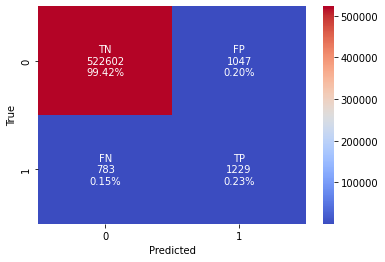

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [83]:
confusion_matrix_view(y_test, pred)

# 오른쪽 두개가 정밀도 precision 1로 예측했는데 실제로 얼마나 1인지 1종오류 문제
# 아래꺼 두개 재현율 recall 실제 1중에 얼마나 재현 됐는지 2종오류 문제
# 작을수록 안좋음 정밀도가 낮으니까 더 문제 



# 둘다 반영 ㅅ킬려면 f1score

In [84]:
# 정밀도 precision 1종오류 (FP) 
# 재현율 recall 2종오류 (FN)
# f1점수 정밀도와 재현율의 조화평균
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [85]:
# 0과 1로 분류 분류 되기 전에 얼마나 각각의 확률이 산출 되는지
model.predict_proba(X_test)

array([[9.99875434e-01, 1.24566042e-04],
       [9.99877296e-01, 1.22704031e-04],
       [9.99869010e-01, 1.30989526e-04],
       ...,
       [9.99868033e-01, 1.31966775e-04],
       [9.99337678e-01, 6.62322460e-04],
       [9.99834092e-01, 1.65908474e-04]])

In [86]:
# 각 행 -> 입력받은 시험셋의 행 데이터별로, 각각의 분류가 될 확률
# 2차원 행열 각각 열
# 0열 0에대한 예측값 확률값
# 1열 1에대한 예측값
proba = model.predict_proba(X_test)
proba

array([[9.99875434e-01, 1.24566042e-04],
       [9.99877296e-01, 1.22704031e-04],
       [9.99869010e-01, 1.30989526e-04],
       ...,
       [9.99868033e-01, 1.31966775e-04],
       [9.99337678e-01, 6.62322460e-04],
       [9.99834092e-01, 1.65908474e-04]])

In [87]:
# 넘파이 인덱싱 모든행에 0열만 불러오겠다
proba[:, 1] # 예측값이 1이 될 확률/ 이상거래일 확률 

array([0.00012457, 0.0001227 , 0.00013099, ..., 0.00013197, 0.00066232,
       0.00016591])

In [88]:
proba = proba[:, 1] # proba = 이상거래일 확률 예측치 

In [89]:
# default 0.5보다 크면 1로 분류
# 민감하게 혹은 둔감하게 
# case 1 : 0.2 만 넘으면 1로 분류 느슨한 케이스 
# case 2 : 0.8을 넘어야 1로 분류 엄격한 케이스

# 벡터화연산으로 비교연산 (0.2보다 크다) 하면 T/F이 되고 이걸 int로 변환하면 0또는 1이 됨
proba_int1 = (proba > 0.2).astype('int')
proba_int1

array([0, 0, 0, ..., 0, 0, 0])

0과 1로 규성 되어 있는 데이터에 `mean` 평균을 내면 1의 비중을 알 수 있음 예측치로 환산하면 이상거래로 분류된 비중을 볼 수 있는 거임

In [92]:
pred.mean() # 기준이 0.5일 때 예측치

0.004329786687618065

In [90]:
proba_int1.mean() # 기준이 0.2일 때 예측칙

0.006190301353914405

In [93]:
proba_int2 = (proba > 0.8).astype('int')
proba_int2

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
proba_int2.mean() # 기준이 0.8일 때 예측치

0.002733700997410879

[[522602   1047]
 [   783   1229]]


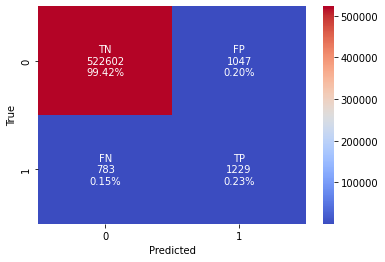

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.61      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.80      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [95]:
# 0.5 기준 분류리포트랑 혼동행렬
confusion_matrix_view(y_test, pred)

[[521834   1815]
 [   573   1439]]


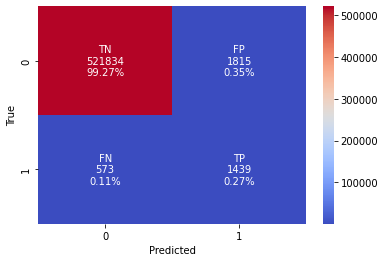

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.44      0.72      0.55      2012

    accuracy                           1.00    525661
   macro avg       0.72      0.86      0.77    525661
weighted avg       1.00      1.00      1.00    525661



In [96]:
# 기준이 0.2일때
confusion_matrix_view(y_test, proba_int1) # 
# fp가 늘음 1종오류 늘음 이상거래가 아닌데 맞다고 판단 한 것이 늘음
# fn은 줄음 2종오류 줄음 이상거래 맞는데 아니라고 판단한 것이 줄음

[[523093    556]
 [  1131    881]]


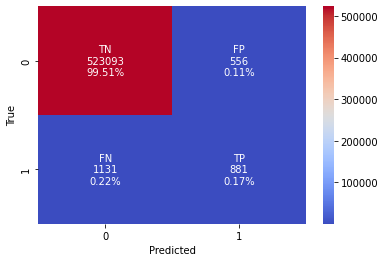

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.61      0.44      0.51      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.72      0.75    525661
weighted avg       1.00      1.00      1.00    525661



In [97]:
# 기준이 0.8
confusion_matrix_view(y_test, proba_int2)
# fp가 줄음 1종오류 줄음 이상거래가 아닌데 맞다고 판단 한 것이 줄음
# fn은 늘음 2종오류 늘음 이상거래 맞는데 아니라고 판단한 것이 늘음

## ROC 곡선 & AUC

![ROC](https://i.imgur.com/euCumVh.png)

* [참고](https://losskatsu.github.io/machine-learning/stat-roc-curve/#2-%EB%AF%BC%EA%B0%90%EB%8F%84%EC%99%80-%ED%8A%B9%EC%9D%B4%EB%8F%84)
* 이진분류 모델을 평가하는 방법으로 기준점에 영향을 받지 않기 때문에 여러 모델을 비교할 때 요긴하게 사용
* AUC는 ROC 곡선의 아래 면적을 의미
    * 0.5~1 사이의 값을 지니며 높을수록 좋은 모델

## ROC 곡선
> 민감도, 특이도 개념을 활용

### 민감도 (TPR)
$TPR = \frac{TP(참 양성)}{TP(참 양성) + FN(거짓 음성)}$
* 재현율과 수식이 같음
* 실제 1인 것 중 얼마만큼 제대로(1로) 예측되었는지
* 1에 가까울 수록 좋은 수치

민감도를 높이기 위해서 기준을 낮추면 반대로 FPR이 증가하게 됨 역의 관계
예측력이 좋은 모델이면 변화치가 높지 않음

### 특이도 (TNR) **
$TNR = \frac{TN(참 음성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 제대로(0로) 예측되었는지
* 1에 가까울 수록 좋은 수치

$FPR = \frac{FP(거짓 양성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 잘못(1로) 예측되었는지
* 0에 가까울 수록 좋은 수치
$FPR = 1 - TNR$

![ROC](https://i.imgur.com/euCumVh.png)
* 기준점을 바꿨을 때 TPR, FPR이 어떻게 바뀌는지 보여주는 그래프
* 최악의 경우 (학습이 전혀 안될 경우) -> 빨간색 점선

### AUC (Area Under the ROC Curve)
* ROC 곡선의 아래쪽에 해당하는 면적
* 0.5~1 사이의 값을 가지며 커질 수록 더 좋은 분류기라는 의미
![AUC](https://i.imgur.com/udlCMW4.png)

In [98]:
# 0과 1을 얼마나 잘 분류하는지 성능좋은지
# 1이 될 확률 proba 
# 
roc_auc_score(y_test,proba)

#TPR이 1에 가까운 좋은 모델  

0.9614512689355635

# 하이퍼 패러미터 튜닝
* 그리드 서치 : 주입할 패러미터 목록들을 딕셔너리 형태로 넣어서, 각각의 패러미터들을 모두 조합한 모델들을 학습시켜봐서 최적의 모델을 찾는 것
  * 다 시도 해봤자 시간낭비 일 수 있다 
  * 빨리 적당한 패러미터 조합이 필요할 수 있음
  
* 랜덤 서치 더 넓은 영역의 하이퍼 파라미터 값을 더 잛은 시간에 다양하게 활용
  * 일부만 추출해서 모델링 시간은 더 짧아짐  


## 랜덤 서치

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
# 랜덤 서치에 사용 될 파라미터들 (딕셔너리)
params = {
    "n_esimators": [100, 500, 1000], #총 생성할 트리 개수 
    "learning_rate": [0.01, 0.05, 0.1, 0.3], # 경사 하강법에 적용할 학습률 (오차를 어느 범위만큼 수정할까)
    # 너무 작으면 -> 오버피팅, 시간 오래걸림/너무 크면 학습이 제대로 안 됨
    "lambda_l1": [0, 10, 20, 30, 50],
    "lambda_l2": [0, 10, 20, 30, 50],
    # 경사하강법과 관련 오버피팅 줄이기 
    "max_depth": [5, 10, 15, 20], # 트리의 최대깊이 / 과적합
    "subsample": [0.6, 0.8, 1] # 일부의 데이터만 사용해서 트리를 만들게 1은 전체 
}

## L1 정규화(lambda_l1)와 L2 정규화(lambda_l2)
* 라쏘 회귀(lasso regression) - L1 정규화
* 릿지 회귀(rigde regression) - L2 정규화
> 둘 다 매개 변수에 패널티를 가해서 그 영향력(계수)을 감소 시키는 방법.<br>
오버피팅을 방지하는 목적으로 쓰임

In [103]:
model2 = lgb.LGBMClassifier(random_state=26)
#  param_distributions=params 랜덤 서치에 쓰일 파라미터들, n_iter 몇번  조합을 추출할지
# scoring 모델간 비교수치 accuracy, f1score 등 여기선 위에 설명했던 roc_auc n_jobs 사용할 cpu 코어 개수 -1이면 전체 사용 
rs = RandomizedSearchCV(model2, param_distributions=params, n_iter=30,
                        scoring='roc_auc', random_state=26, n_jobs=-1)

In [104]:
import time
start = time.time() 
rs.fit(X_train, y_train)
print(time.time() - start)

1493.8346862792969


In [105]:
rs.best_params_

{'subsample': 1,
 'n_esimators': 100,
 'max_depth': 20,
 'learning_rate': 0.1,
 'lambda_l2': 50,
 'lambda_l1': 10}

In [108]:
rs.best_score_

0.9940683753009398

In [106]:
rs_proba = rs.predict_proba(X_test)

In [107]:
# rs_proba[:, 1] : proba -> 0열 : 0이 될 확률, 1열: 1이 될 확률
# [모든행중에, 1번째열] -> 1이 될 확률만 호출
roc_auc_score(y_test, rs_proba[:, 1])

0.9941047989147663

[[522346   1303]
 [   472   1540]]


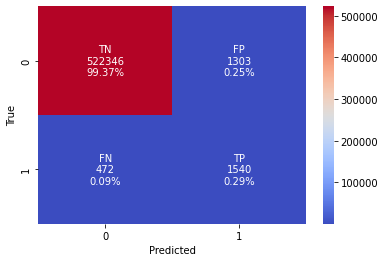

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.77      0.63      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.88      0.82    525661
weighted avg       1.00      1.00      1.00    525661



In [109]:
# 0.2로 조금 더 느슨하게 정밀도를 희생하고 재현율을 높임
rs_proba_int1 = (rs_proba[:,1] > 0.2).astype('int') # 1이 될 확률이 0.2만 넘어가도 1로 취급
confusion_matrix_view(y_test,rs_proba_int1)

[[523632     17]
 [  1228    784]]


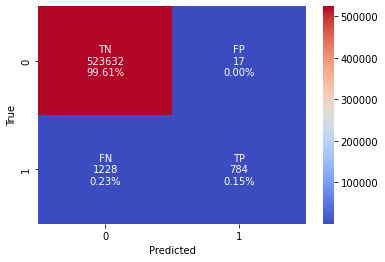

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.98      0.39      0.56      2012

    accuracy                           1.00    525661
   macro avg       0.99      0.69      0.78    525661
weighted avg       1.00      1.00      1.00    525661



In [110]:
# 0.8로 타이트하게 재현율을 희생하고 정밀도를 높임
rs_proba_int2 = (rs_proba[:,1] > 0.8).astype('int') # 1이 될 확률이 0.8만 넘어가도 1로 취급
confusion_matrix_view(y_test,rs_proba_int2)

# model.train() 함수 이제 사장 됨

In [ ]:
# model.fit(X_train, y_train) 로 학습해왔음
# 예전엔 model.train()로 씀 이걸 사용하게 편하게 수정한게 fit임
# 옛날옛날엔 훈련셋 시험셋 말고도 검증셋 이란게 있었다.. 

||train|fit|
|-|-|-|
|검증셋|모델링 - 검증셋|검증 X|
|데이터셋|데이터프레임->별도포맷변환|데이터프레임,시리즈|
|하이퍼패러미터|하이퍼패러미터 Default X|기본값|
|사이킷런 연동|X|O(그리드 서치...)|
학습 -> 학습셋 => model => 시험셋
학습 -> 학습셋과는 별개로 (검증셋) => model

In [112]:
# 훈련셋 / 시험셋 (fit)
# 훈련셋 / 검증셋 / 시험셋 (train)
train = df[df.index < '2020-01-01']
val = df[(df.index >= '2020-01-01') & (df.index < '2020-07-01')] # validation
test = df[df.index >= '2020-07-01']

In [113]:
def get_X_y(df):
  X = df.drop('is_fraud', axis=1)
  y = df.is_fraud
  return(X,y)

In [114]:
# 훈련셋, 검증셋, 시험셋 (X, y)
X_train, y_train = get_X_y(train)
X_val, y_val = get_X_y(val)
X_test, y_test = get_X_y(test)

In [116]:
# 데이터셋 변환
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)


In [115]:
param_set = rs.best_params_
param_set

{'subsample': 1,
 'n_esimators': 100,
 'max_depth': 20,
 'learning_rate': 0.1,
 'lambda_l2': 50,
 'lambda_l1': 10}

In [117]:
# 위에 빠진 평가 관련 수치
param_set['metrics'] = 'auc'
param_set

{'subsample': 1,
 'n_esimators': 100,
 'max_depth': 20,
 'learning_rate': 0.1,
 'lambda_l2': 50,
 'lambda_l1': 10,
 'metrics': 'auc'}

In [118]:
# model.train(모델링할 때 쓰이는 하이퍼 파라미터 값들, 훈련셋, 검증셋,
# early_stopping_rounds:  최대 학습시간을 제한하고 더이상 score가 개선이 안되면 멈추기,
# verbose_eval = n번째에서 메시지 표시 
# param_set['metrics'] = 'auc'에 뜬 100까지 했을 때 더 이상 개선이 안되면 스탑 
model_train = lgb.train(param_set,d_train,valid_sets=[d_val],
                        early_stopping_rounds=100, verbose_eval=100)

#

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.987648
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.987648


In [120]:
pred_train = model_train.predict(X_test)

In [124]:
pred_train # 확률로 나와서 astype 해줘야함 

array([0.00032258, 0.00037048, 0.00042241, ..., 0.00025285, 0.00152018,
       0.0001863 ])

[[523334    315]
 [   881   1131]]


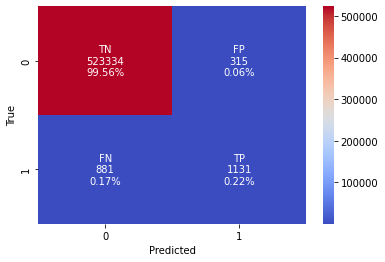

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.78      0.56      0.65      2012

    accuracy                           1.00    525661
   macro avg       0.89      0.78      0.83    525661
weighted avg       1.00      1.00      1.00    525661



In [123]:
confusion_matrix_view(y_test, (pred_train > 0.5).astype('int'))

# 변수 중요도

In [126]:
model.feature_importances_

array([599, 345, 357, 440, 232, 181, 408,  34,   7,  22,  20,  15,  22,
        29,  27,  71,  20,  37,  23,  56,  55])

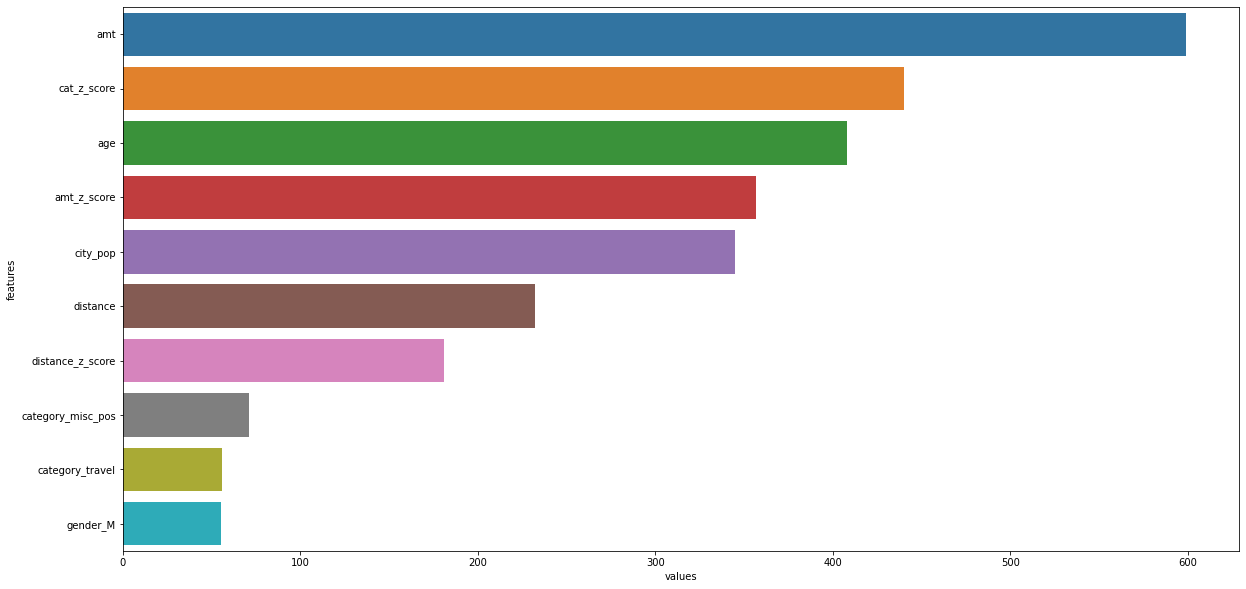

In [125]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data=feature_imp.sort_values(by='values', ascending=False).head(10))
plt.show()